# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# cities = cities[:15] #Limits # of calls - delete later
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information & query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Create empty lists
city_name = []
country = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind = []

count = 0

In [5]:
# Loop for data request
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        print(f'Processing Record: {count} {response["name"]}')
    except:
        print("city not found")
    count += 1
    
print("----------------------\nComplete")

city not found
Processing Record: 1 Komyshuvakha
Processing Record: 2 Bengkulu
Processing Record: 3 Punta Arenas
city not found
Processing Record: 5 Yellowknife
Processing Record: 6 Mataura
Processing Record: 7 Jamestown
Processing Record: 8 Bluff
Processing Record: 9 Malanje
Processing Record: 10 Faya
Processing Record: 11 East London
Processing Record: 12 Aleppo Governorate
Processing Record: 13 Rikitea
Processing Record: 14 Mahébourg
Processing Record: 15 Altagracia de Orituco
Processing Record: 16 Vila Velha
Processing Record: 17 Kaoma
city not found
Processing Record: 19 Takoradze
Processing Record: 20 Saldanha
Processing Record: 21 George Town
Processing Record: 22 Vaini
Processing Record: 23 Jasper
Processing Record: 24 Khatanga
Processing Record: 25 Mäntsälä
Processing Record: 26 Bethel
Processing Record: 27 Poum
Processing Record: 28 Clyde River
Processing Record: 29 Souillac
Processing Record: 30 Albany
Processing Record: 31 Fonte Boa
Processing Record: 32 Jamame
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dictionary for dataframe
weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Longitude": lng,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind
}

In [7]:
# Convert to dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Komyshuvakha,UA,47.72,35.53,46.20,100,90,8.95
1,Bengkulu,ID,-3.80,102.27,80.02,75,100,2.39
2,Punta Arenas,CL,-53.15,-70.92,46.40,87,90,4.70
3,Yellowknife,CA,62.46,-114.35,3.90,77,75,8.05
4,Mataura,NZ,-46.19,168.86,57.99,82,100,13.00


In [8]:
# Export to CSV
weather_df.to_csv('output_data/weather_data.csv',index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Check to see if there is humidity > 100%
weather_df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,19.625317,12.771630,57.908834,72.518010,48.418525,8.387118
std,32.681550,88.309928,22.206378,20.837102,42.252267,6.368412
min,-54.800000,-175.200000,-17.070000,9.000000,0.000000,0.180000
25%,-7.675000,-62.385000,44.600000,61.000000,1.000000,3.835000
50%,21.400000,17.400000,62.940000,78.000000,40.000000,6.930000
75%,47.450000,86.890000,75.610000,88.000000,95.500000,11.170000
max,78.220000,178.420000,96.800000,100.000000,100.000000,56.100000


In [11]:
# high_humidity_cities = weather_df.loc[weather_df["Humidity"] > 100]
# high_humidity_cities

In [12]:
# This data does not include any cities with humidity > 100% --> skipping

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

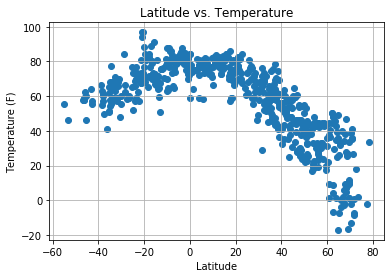

In [13]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"])
plt.title("Latitude vs. Temperature")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("output_data/lat_vs_temp.png")

## Latitude vs. Humidity Plot

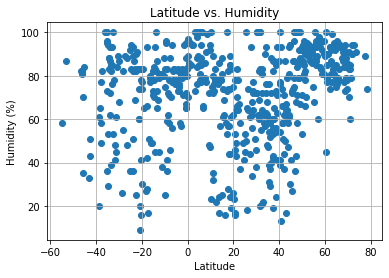

In [14]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])
plt.title("Latitude vs. Humidity")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("output_data/lat_vs_humid.png")

## Latitude vs. Cloudiness Plot

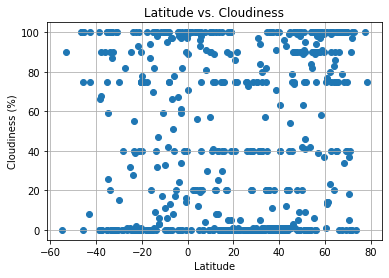

In [15]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("output_data/lat_vs_clouds.png")

## Latitude vs. Wind Speed Plot

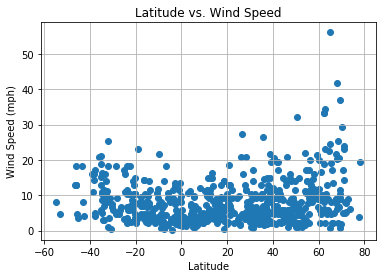

In [16]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])
plt.title("Latitude vs. Wind Speed")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("output_data/lat_vs_winds.png")

## Linear Regression

In [18]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = weather_df.loc[weather_df["Latitude"] >= 0]
south_hem = weather_df.loc[weather_df["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation of latitude to maximum temperature for a city in the northern hemisphere is -0.86121
The r-squared is 0.74168


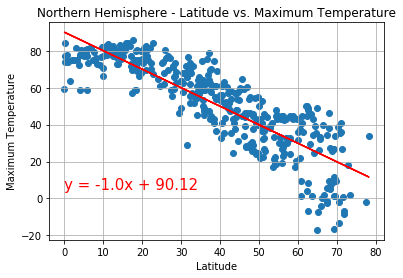

In [19]:
x_values = north_hem["Latitude"]
y_values = north_hem["Temperature"]
correlation = north_hem["Latitude"].corr(north_hem["Temperature"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Northern Hemisphere - Latitude vs. Maximum Temperature")
plt.grid()
print(f"The correlation of latitude to maximum temperature for a city in the northern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation of latitude to maximum temperature for a city in the southern hemisphere is 0.68836
The r-squared is 0.47385


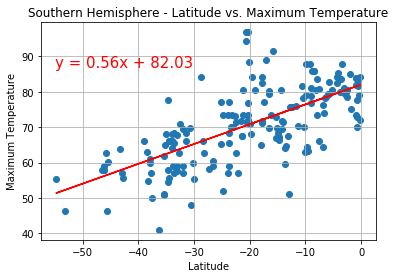

In [20]:
x_values = south_hem["Latitude"]
y_values = south_hem["Temperature"]
correlation = south_hem["Latitude"].corr(south_hem["Temperature"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,87),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Southern Hemisphere - Latitude vs. Maximum Temperature")
plt.grid()
print(f"The correlation of latitude to maximum temperature for a city in the southern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation of latitude to humidity for a city in the northern hemisphere is 0.26389
The r-squared is 0.06964


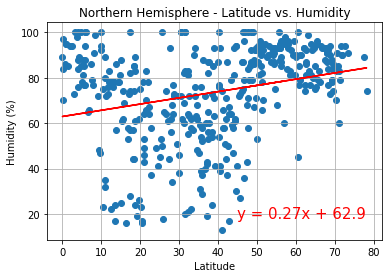

In [21]:
x_values = north_hem["Latitude"]
y_values = north_hem["Humidity"]
correlation = north_hem["Latitude"].corr(north_hem["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,18),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.grid()
print(f"The correlation of latitude to humidity for a city in the northern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation of latitude to humidity for a city in the southern hemisphere is 0.10069
The r-squared is 0.01014


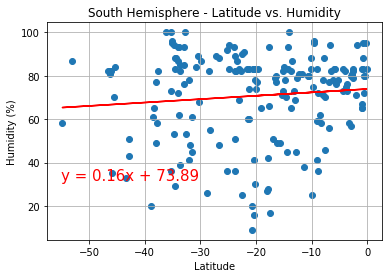

In [22]:
x_values = south_hem["Latitude"]
y_values = south_hem["Humidity"]
correlation = south_hem["Latitude"].corr(south_hem["Humidity"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,32),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("South Hemisphere - Latitude vs. Humidity")
plt.grid()
print(f"The correlation of latitude to humidity for a city in the southern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation of latitude to cloudiness for a city in the northern hemisphere is 0.1991
The r-squared is 0.03964


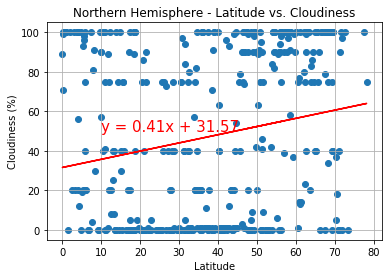

In [23]:
x_values = north_hem["Latitude"]
y_values = north_hem["Cloudiness"]
correlation = north_hem["Latitude"].corr(north_hem["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.grid()
print(f"The correlation of latitude to cloudiness for a city in the northern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation of latitude to cloudiness for a city in the southern hemisphere is -0.00999
The r-squared is 0.0001


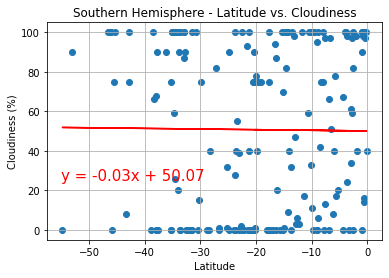

In [24]:
x_values = south_hem["Latitude"]
y_values = south_hem["Cloudiness"]
correlation = south_hem["Latitude"].corr(south_hem["Cloudiness"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.grid()
print(f"The correlation of latitude to cloudiness for a city in the southern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation of latitude to wind speed for a city in the northern hemisphere is 0.32238
The r-squared is 0.10393


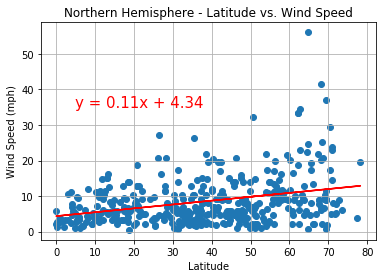

In [25]:
x_values = north_hem["Latitude"]
y_values = north_hem["Wind Speed"]
correlation = north_hem["Latitude"].corr(north_hem["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.grid()
print(f"The correlation of latitude to wind speed for a city in the northern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation of latitude to wind speed for a city in the southern hemisphere is -0.3435
The r-squared is 0.11799


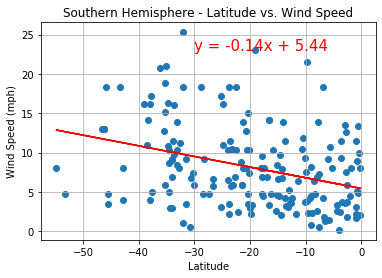

In [26]:
x_values = south_hem["Latitude"]
y_values = south_hem["Wind Speed"]
correlation = south_hem["Latitude"].corr(south_hem["Wind Speed"])

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,23),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.grid()
print(f"The correlation of latitude to wind speed for a city in the southern hemisphere is {round(correlation, 5)}")
print(f"The r-squared is {round(rvalue**2, 5)}")
plt.show()